In [2]:
import sys
import os

In [3]:
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [5]:
from _01_data.DataIngestor import DataIngestor
from _01_data.DataExplorer import DataExplorer
from _02_preprocessing.PreProcessor import PreProcessor
from _03_features.FeatureEngineer import FeatureEngineer
from _04_modelling.MLBacktester import MLBacktester
from _04_modelling.LogisticRegression import *
from _04_modelling.NeuralNetwork import *


ModuleNotFoundError: No module named 'tensorflow.python'

In [4]:
config_dir = os.path.join(os.path.dirname(os.getcwd()), 'configurations')
if config_dir not in sys.path:
    sys.path.append(config_dir)
    
from config import *

In [5]:
ticker = "MSFT"
start = "2022-05-01"
end = "2024-03-01"
interval = "hour"
agg_method = {
            'price': 'last',  # Use the last price in the period
            'volume': 'sum'   # Sum up the volumes in the period
             }

In [6]:
yahoo_interval = INTERVAL_MAPPING[interval]['yahoo_finance']

In [7]:
di = DataIngestor(ticker, start=start, end=end, interval=yahoo_interval)


In [8]:
di.adjust_columns(COLUMN_MAPPING)

In [9]:
de = DataExplorer(di.data, ticker, interval)

In [10]:
de.add_log_diff_column("price", "log_returns")

mean: 0.00012040025434181183 | std: 0.0068557964026939935
skew: -0.021891799863206905 | kurtosis: 16.523164307471887
CAGR: 0.21800663485892535 | Annualised mean: 0.19721561661188777 | std: 0.004872864701615317
668
Multiple: 1.4712665311782767 | Percentage change (%): 47.126653117827665 | CAGR: 0.23506700724486462


C:\Users\KaranSadhwani\github\financial-prediction-pipeline\src\_01_data\DataExplorer.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multiple = self.data[variable][-1] / self.data[variable][0]


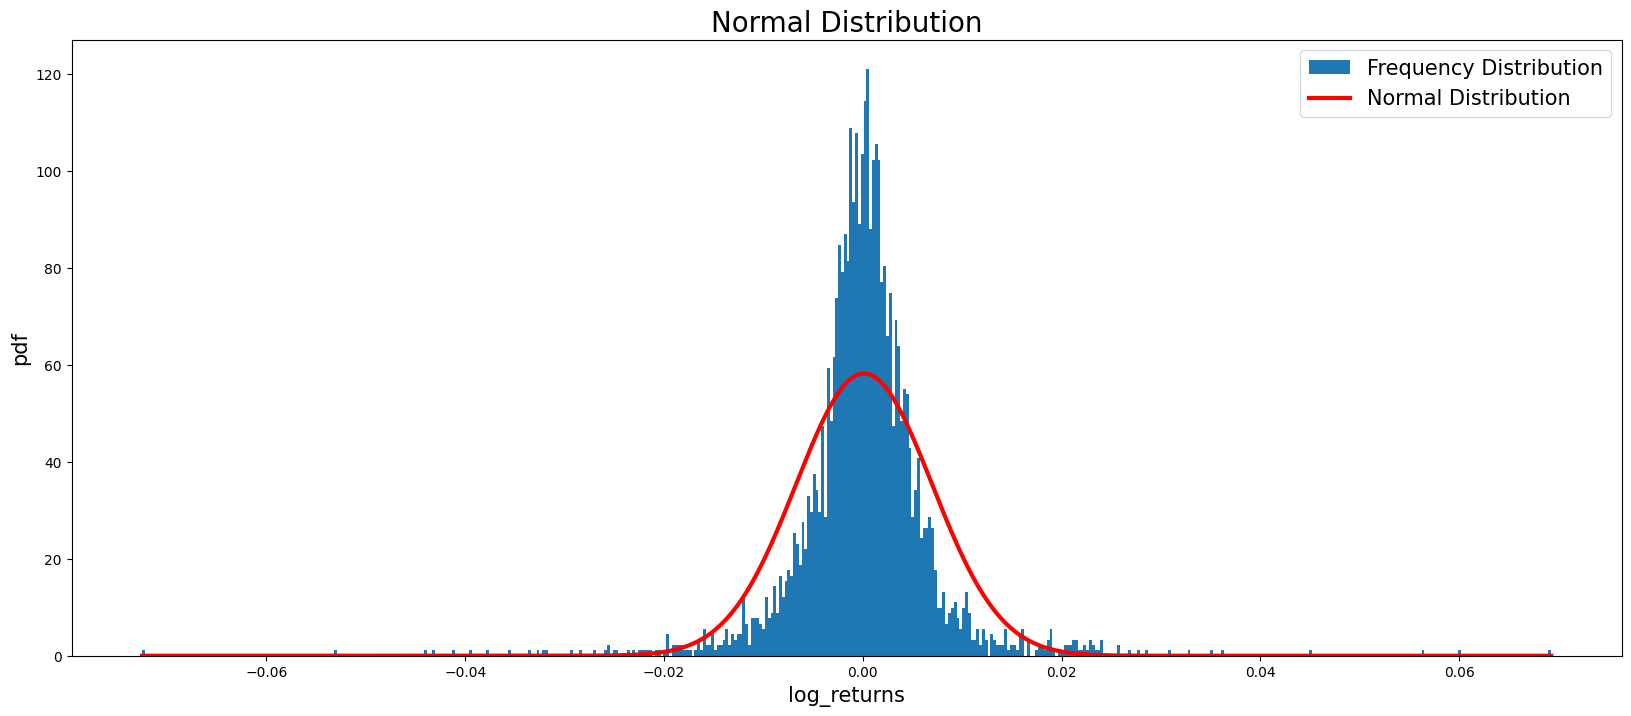

In [11]:
de.distribution_stats("log_returns")
de.annualised_perf("log_returns", INTERVAL_MAPPING)
de.simple_perf("price")
de.plot_histogram("log_returns")

In [ ]:
# temp workaround to get histroic 5 min data which is not available on yfinance
symbol = "EURUSD"
ptc = 0.00007
start = "2019-01-01"
end ="2020-08-31"
raw = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
raw = raw[symbol].to_frame().dropna()
raw = raw.loc[start:end]
raw.rename(columns={symbol: "price"}, inplace=True)
print(raw)

In [12]:
pp = PreProcessor(de.data)

In [13]:
pp.add_log_diff_column("price", "log_returns")

In [14]:
pp.split_data(train_ratio=0.7)

(                                price   volume  log_returns
 date                                                       
 2022-05-02 09:30:00-04:00  280.996002  7860912          NaN
 2022-05-02 10:30:00-04:00  278.549988  3973129    -0.008743
 2022-05-02 11:30:00-04:00  281.429993  3652121     0.010286
 2022-05-02 12:30:00-04:00  280.040009  3252955    -0.004951
 2022-05-02 13:30:00-04:00  278.130005  2795178    -0.006844
 ...                               ...      ...          ...
 2023-08-11 10:30:00-04:00  319.734985  2178530    -0.005878
 2023-08-11 11:30:00-04:00  320.299988  2082880     0.001766
 2023-08-11 12:30:00-04:00  321.195007  1394943     0.002790
 2023-08-11 13:30:00-04:00  321.700012  2226594     0.001571
 2023-08-11 14:30:00-04:00  321.750000  1220036     0.000155
 
 [2245 rows x 3 columns],
                                 price   volume  log_returns
 date                                                       
 2023-08-11 14:30:00-04:00  321.750000  1220036     0.000

In [ ]:
# timezone = "America/New_York"
# de.convert_timezone()
# de.data.head()
# de.data["hour"] = de.data[timezone].dt.hour
# de.add_diff_column("price", overnight_gap=False)
# de.plot_barchart("volume")
# de.plot_barchart("diff_price")



In [ ]:
de.resample("day", INTERVAL_MAPPING, agg_method)
de.add_log_diff_column("price")

In [ ]:
de.distribution_stats("log_returns")
de.annualised_perf("log_returns", INTERVAL_MAPPING)
de.simple_perf("price")
de.plot_histogram("log_returns")

In [ ]:
de.data.to_csv("daily_data.csv")

In [ ]:
de.resample("week", INTERVAL_MAPPING, agg_method)
print(de)
de.add_log_diff_column("price")


In [ ]:
de.distribution_stats("log_returns")
de.annualised_perf("log_returns", INTERVAL_MAPPING)
de.simple_perf("price")
de.plot_histogram("log_returns")

In [ ]:
de.data.to_csv("weekly_data.csv")